In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from utils import *
from model import *

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [4]:
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [5]:

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)


#### Define model parameters

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(test_data, **kwargs)

### Check sample images

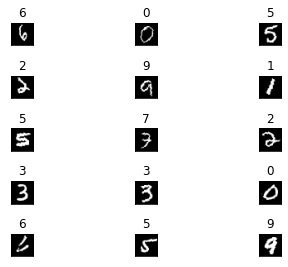

In [7]:
plot_sample(train_loader,15)

### Model training

In [8]:
model = Net().to(device)
input_size = (1,28,28)
model_summary(model,input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2920 Batch_id=19 Accuracy=12.20: 100%|██████████| 20/20 [00:01<00:00, 14.35it/s]


Test set: Average loss: 0.0046, Accuracy: 1583/10000 (15.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.1905 Batch_id=19 Accuracy=26.87: 100%|██████████| 20/20 [00:01<00:00, 16.28it/s]


Test set: Average loss: 0.0044, Accuracy: 5203/10000 (52.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=3.4328 Batch_id=19 Accuracy=54.04: 100%|██████████| 20/20 [00:01<00:00, 14.78it/s]


Test set: Average loss: 0.0044, Accuracy: 2995/10000 (29.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=2.2922 Batch_id=19 Accuracy=15.36: 100%|██████████| 20/20 [00:01<00:00, 14.66it/s]


Test set: Average loss: 0.0046, Accuracy: 1658/10000 (16.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=2.2735 Batch_id=19 Accuracy=19.03: 100%|██████████| 20/20 [00:01<00:00, 14.54it/s]


Test set: Average loss: 0.0045, Accuracy: 1914/10000 (19.14%)

Adjusting learning rate of group 0 to 1.0000e-02.


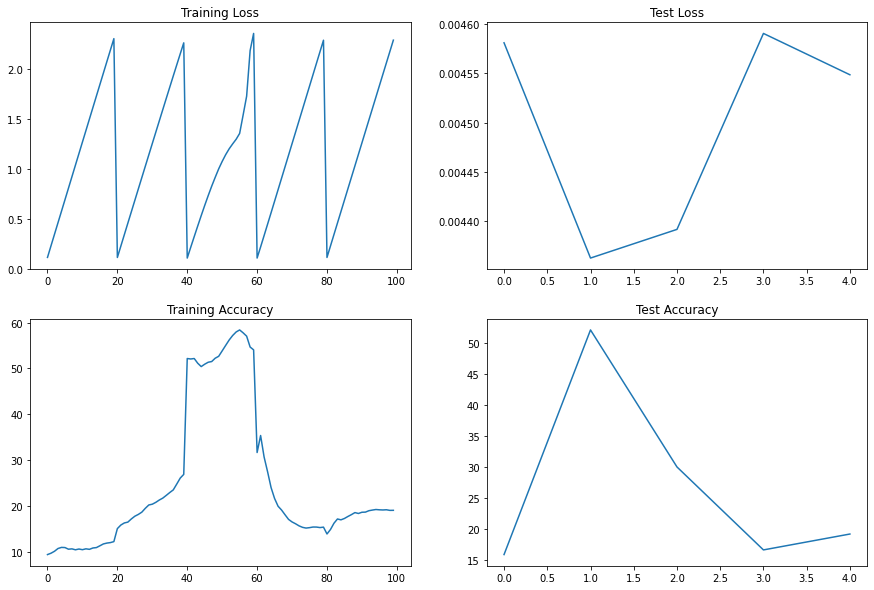

In [10]:
draw_graphs()